<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/04_Image_Processing_Experiments_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thresholding**

Partitioning an image into a foreground and background by making it black and white

We do so by setting each pixel to:
1. 255 (white) if pixel > thresh value
2. 0 (black) if pixel < thresh value

Simplest method of image segmentation and is done only from grayscale images
1. Isolate objects
2. Object detection
3. Face detection
4. Etc.

In [0]:
# Download the images from github using wget
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/chess.jpg

--2020-03-10 15:09:10--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/chess.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229288 (224K) [image/jpeg]
Saving to: ‘chess.jpg.1’

chess.jpg.1         100%[===================>] 223.91K  --.-KB/s    in 0.03s   

2020-03-10 15:09:10 (7.67 MB/s) - ‘chess.jpg.1’ saved [229288/229288]



In [0]:
import matplotlib.pyplot as plt
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('on')
  plt.show()

In [0]:
import numpy as np
image = plt.imread('chess.jpg')

In [0]:
# Import the modules from skimage
from skimage import data, color

# Convert the image to grayscale
image = color.rgb2gray(image)*255

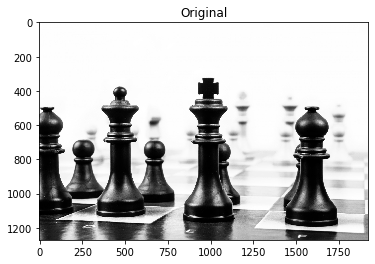

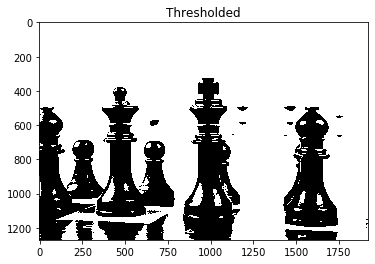

In [0]:
# Obtain the optimal threshold value
thresh = 127
# Apply thresholding to the image
binary = image > thresh
# Show the original and thresholded
show_image(image, 'Original')
show_image(binary, 'Thresholded')

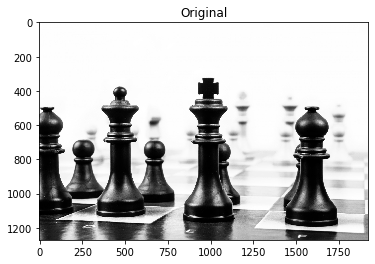

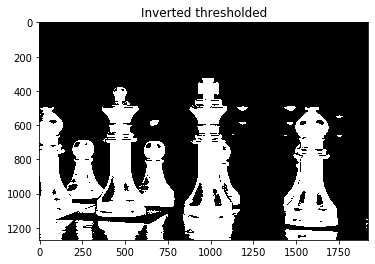

In [0]:
# Obtain the optimal threshold value
thresh = 127
# Apply thresholding to the image
inverted_binary = image <= thresh
# Show the original and thresholded
show_image(image, 'Original')
show_image(inverted_binary,
'Inverted thresholded')

**otsu threshold function**

In computer vision and image processing, Otsu's method is used to perform automatic image thresholding.

In the simplest form, the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. 

This threshold is determined by minimizing intra-class intensity variance, or equivalently, by maximizing inter-class variance.

In [0]:
from skimage import data, color

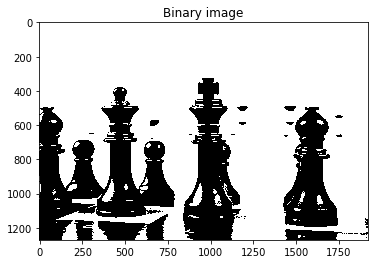

In [0]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

**Global and Local Thresholds**

If it isn't that obvious to identify the background or if the image background is relatively uniform, then the global threshold value can be used, using threshold_otsu(). 

However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In [0]:
# Download the images from github using wget
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/text_page.png

--2020-03-10 15:09:12--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/text_page.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54627 (53K) [image/png]
Saving to: ‘text_page.png.1’

text_page.png.1     100%[===================>]  53.35K  --.-KB/s    in 0.01s   

2020-03-10 15:09:12 (3.53 MB/s) - ‘text_page.png.1’ saved [54627/54627]



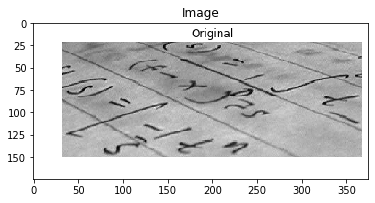

In [0]:
page_image = plt.imread('text_page.png')
show_image(page_image)

In [0]:
# Convert the image to grayscale
page_image = color.rgb2gray(page_image) * 255

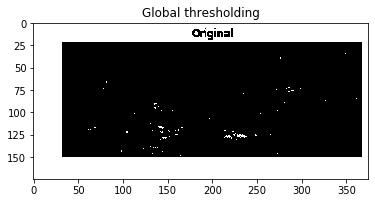

In [0]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

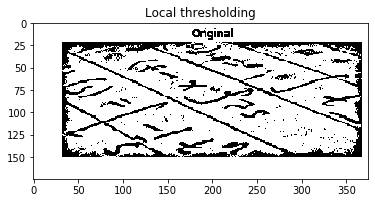

In [0]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

In [0]:
# Download the images from github using wget
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/fruits.jpg

--2020-03-10 15:32:56--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54235 (53K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  52.96K  --.-KB/s    in 0.01s   

2020-03-10 15:32:56 (3.69 MB/s) - ‘fruits.jpg’ saved [54235/54235]



In [0]:
fruits_image = plt.imread('fruits.jpg')

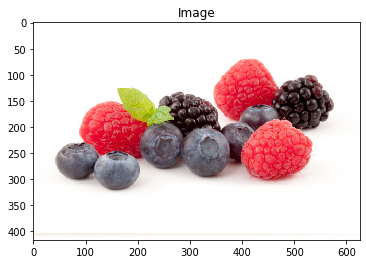

In [0]:
show_image(fruits_image)

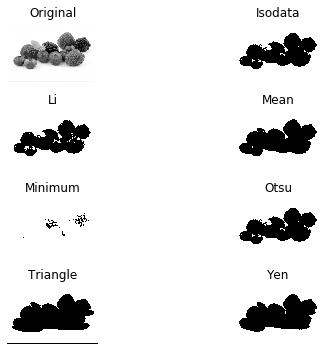

In [0]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

In [0]:
# Download the images from github using wget
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/tools.jpg

--2020-03-10 15:57:04--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/tools.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32285 (32K) [image/jpeg]
Saving to: ‘tools.jpg’

tools.jpg           100%[===================>]  31.53K  --.-KB/s    in 0.007s  

2020-03-10 15:57:04 (4.11 MB/s) - ‘tools.jpg’ saved [32285/32285]



In [0]:
tools_image = plt.imread('tools.jpg')

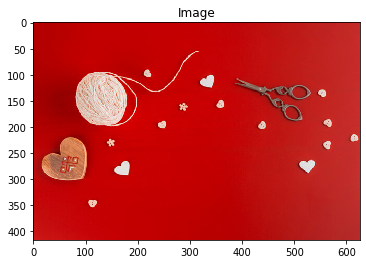

In [0]:
show_image(tools_image)

In [0]:
# Turn the fruits image to grayscale
gray_tools_image = rgb2gray(tools_image)

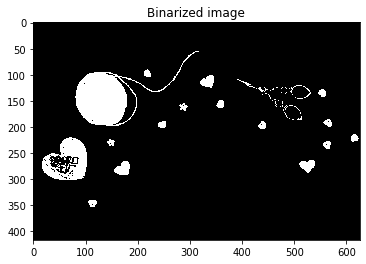

In [0]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

*Includes Personal notes on Image Processing with Python from Datacamp